# Case Study: SMS Spam Classification
**26 Maret 2022, Review NLP_01 & NLP_02** 

<br>
kasus klasifikasi SMS spam menggunakan skema seperti gambar di bawah ini.

![title](https://undangmi.com/wp-content/uploads/2022/03/Screen-Shot-2022-03-26-at-23.14.46.png)

Langkah-langkah penyelesaian melitputi:
1. Data collection
2. Pre-processing
   1. Case Folding
   2. Filtering
   3. Stopword
   4. Stemming
3. Feature Extraction
   1. BoW
   2. TF-IDF
4. Feature Selection
   1. Chi-Square

Pada kasus ini, kita menggunakan data set berbahasa indonesia, sehingga kita membutuhkan *Library Sastrawi* untuk menyelesaikan beberapa permasalahan seperti *stemming*.



In [4]:
#import library yang dibutuhkan
import pandas as pd #untuk tabel
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [5]:
!pip -q install sastrawi

In [6]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Data collection

penjelasan label

0 : SMS normal

1 : SMS Fraud atau Penipuan

2 : SMS promo


In [7]:
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv
#kemudian download

--2022-03-28 06:34:51--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128896 (126K) [text/plain]
Saving to: ‘dataset_sms_spam_v1.csv.1’

dataset_sms_spam_v1 100%[===================>] 125.88K  --.-KB/s    in 0.007s  

2022-03-28 06:34:52 (16.5 MB/s) - ‘dataset_sms_spam_v1.csv.1’ saved [128896/128896]



In [8]:
data = pd.read_csv('/content/dataset_sms_spam_v1.csv')

In [9]:
data.head() #melihat data

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teks    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [13]:
print('Total Jumlah SMS', data.shape[0],'data\n') #menampilkan jumlah total data
print('terdiri dari(label)')

print('--- [0] SMS Normal \t:', data[data.label==0].shape[0],'data')
print('--- [1] Fraud / Penipuan \t:', data[data.label==1].shape[0],'data')
print('--- [2] SMS Promo \t\t:', data[data.label==2].shape[0],'data')


Total Jumlah SMS 1143 data

terdiri dari(label)
--- [0] SMS Normal 	: 569 data
--- [1] Fraud / Penipuan 	: 335 data
--- [2] SMS Promo 		: 239 data


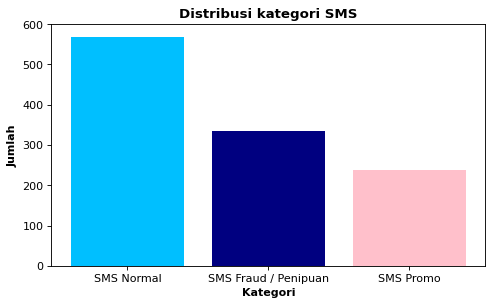

In [19]:
#visulisasi label SMS/SPAM Classification
height = data['label'].value_counts()
labels = ('SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi kategori SMS', fontweight='bold')
plt.xlabel('Kategori', fontweight= 'bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height,color=['deepskyblue','navy', 'pink'])
plt.xticks(y_pos,labels)
plt.show()

#Text Pre-Processing

Case Folding and filtering
mengubah huruf yang tidak kita butuhkan

In [20]:
import re

In [21]:
#buat fungsi langkah dari case folding dan filtering

def casefolding(text):
  text = text.lower() #mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+','',text) #S besar selain simbol
  text = re.sub(r'[0-9]+', '', text) #menghapus angka
  text = re.sub(r'[^\w\s]','',text) #karakter tanda baca
  text = text.strip()
  return text

In [24]:
raw_sample = data['teks'].iloc[5] #data 1-5
case_folding = casefolding(raw_sample)

In [25]:
print('raw data \t:',raw_sample)
print('Case folding \t:', case_folding)

raw data 	: 5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1
Case folding 	: hari lagi  ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept cek detail promo di tselmemytsel


#Word Normalization

In [26]:
#Download corpus slang word
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv


--2022-03-28 07:29:03--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.002s  

2022-03-28 07:29:03 (33.3 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [28]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join ([key_norm[key_norm['singkat']==word]['hasil'].values[0] if (key_norm['singkat']==word).any() else word for word in text.split()])
  text = str.lower(text)
  return text


In [29]:
raw_sample = data['teks'].iloc[5] #data 1-5
case_folding = casefolding(raw_sample)

In [30]:
print('raw data \t:',raw_sample)
print('Case folding \t:', case_folding)

raw data 	: 5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1
Case folding 	: hari lagi  ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept cek detail promo di tselmemytsel


#stopword Removal
seperti kata penghubung

In [31]:
#import library stopword
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [32]:
len (stopwords_ind)

758

In [33]:
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [34]:
#buat fungsi stopword removal

tambah_stopword = ['rb','gb','tselmemytsel']
stopwords_ind = stopwords_ind + tambah_stopword

def remove_stop_word(text):
  clean_word = []
  text = text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_word.append(word)
  return " ".join(clean_word)

In [38]:
raw_sample = data['teks'].iloc[5] #data 1-5
case_folding = casefolding(raw_sample)
normalize = text_normalize(case_folding)
stopword_removal = remove_stop_word(normalize)

In [40]:
print('raw data \t:',raw_sample)
print('Case folding \t:', case_folding)
print('text_normalize \t:', normalize)
print('Stop word \t:', stopword_removal)

raw data 	: 5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1
Case folding 	: hari lagi  ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept cek detail promo di tselmemytsel
text_normalize 	: hari lagi ekstra pulsa rb dengan beli paket internet bulanan di mytelkomsel untuk pembelian pertama sjk augsept cek detail promo di tselmemytsel
Stop word 	: ekstra pulsa beli paket internet bulanan mytelkomsel pembelian sjk augsept cek detail promo


#Stemming
mengubah ke kata dasar
```



In [41]:
from nltk.text import TextCollection
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#Di sini kita buat fungsi stemming

def stemming(text):
  text = stemmer.stem(text)
  return text


In [42]:
raw_sample = data['teks'].iloc[5]
case_folding = casefolding(raw_sample)
normalize = text_normalize(case_folding)
stopword_removal = remove_stop_word(normalize)
text_stemming = stemming(stopword_removal)


In [43]:
print ('Raw data \t:',raw_sample)
print ('Case folding \t:', case_folding)
print ('text_normalize \t:', normalize)
print ('Stop word \t:', stopword_removal)
print ('Stemming \t:', text_stemming)


Raw data 	: 5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1
Case folding 	: hari lagi  ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept cek detail promo di tselmemytsel
text_normalize 	: hari lagi ekstra pulsa rb dengan beli paket internet bulanan di mytelkomsel untuk pembelian pertama sjk augsept cek detail promo di tselmemytsel
Stop word 	: ekstra pulsa beli paket internet bulanan mytelkomsel pembelian sjk augsept cek detail promo
Stemming 	: ekstra pulsa beli paket internet bulan mytelkomsel beli sjk augsept cek detail promo


#Pre-processing Pipeline

In [44]:
#Di sini kita buat pipelinenya (menggabungkan semua fungsi di atas)

def text_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_word(text)
  text = stemming(text)
  return text


In [45]:
#Time untuk mendapatkan waktu komputasi
%%time 
#proses menjalankan fungsi text_preprocessing pada data teks
data['clean_teks'] = data['teks'].apply(text_preprocessing)


CPU times: user 7min 6s, sys: 1.1 s, total: 7min 7s
Wall time: 7min 32s


In [46]:
#Optional aj yah,
#Simpan data , jika anda ingin menggunakan data clean_teks
data.to_csv('clean_data.csv')


#Feature Engineering/Feature Extaction


In [47]:
data

,teks,label,clean_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash my telkomsel app extra ...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,rupiah ribu spesial pilih aktif promo sd novem...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,pulang hormat sisa kuota flash kb download myt...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,pulang hormat sisa kuota flash kb download myt...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,rupiah ribu spesial pilih aktif buru skb
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,yooo oke umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,0,mbak kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,nama beaok bwrangkat pagimau cas atay tranfer


In [48]:
#pertama, pastikan kita pisahkan kolom feature dan target
X = data['clean_teks']
Y = data['label']

In [49]:
X

0       promo beli paket flash my telkomsel app extra ...
1       rupiah ribu spesial pilih aktif promo sd novem...
2       pulang hormat sisa kuota flash kb download myt...
3       pulang hormat sisa kuota flash kb download myt...
4                rupiah ribu spesial pilih aktif buru skb
                              ...                        
1138                           yooo oke umumin grup kelas
1139                     nulis kerudung kirain warna jins
1140                                        mbak kirim ya
1141        nama beaok bwrangkat pagimau cas atay tranfer
1142                                       nomor bri nama
Name: clean_teks, Length: 1143, dtype: object

In [51]:
Y

0       2
1       2
2       2
3       2
4       2
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: label, Length: 1143, dtype: int64

#Feature Extraction (Bag of Word & N-Gram)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

#BoW - Unigram
vec = CountVectorizer(ngram_range=(1,1))
vec.fit(X)

CountVectorizer()

In [58]:
#melihat jumlah feature ada jumlah kolomnya
print(len(vec.get_feature_names_out()))

3253


In [59]:
#melihat fitur-fitur dalam corpus

print('Fitur:', vec.get_feature_names_out())

Fitur: ['aa' 'aamiiiin' 'aamiin' ... 'zjt' 'zona' 'ztkm']


In [62]:
#melihat vektor kata 

X_unigram = vec.transform(X).toarray()
X_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
data_unigram = pd.DataFrame(X_unigram, columns=vec.get_feature_names_out())
data_unigram

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Feature Extraction (TF-IDF & N-Gram)from 

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X)



In [66]:
#melihat jumlah feature
print(len(tf_idf.get_feature_names_out()))

3253


In [67]:
#melihat fitur-fitur di dalam corpus

print ('Fitur:', vec.get_feature_names_out(10))

Fitur: ['aa' 'aamiiiin' 'aamiin' ... 'zjt' 'zona' 'ztkm']


In [68]:
#melihat vektor kata 

X_tf_idf = vec.transform(X).toarray()
X_tf_idf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [70]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Feature Selection

In [76]:
X = np.array(data_tf_idf)
Y = np.array (Y)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#proses algoritma
chi2_features = SelectKBest(chi2, k=2000)
X_kbest_features = chi2_features.fit_transform(X,Y)

#melihat data
print('Original feature:',X.shape[1])
print('Selectedfeature:',X_kbest_features.shape[1])

Original feature: 3253
Selectedfeature: 2000


In [81]:
#membuat dataframe nilai setiap fitur dari chi-square

data_chi2 = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
data_chi2

,Nilai
0,2.110508
1,1.008787
2,4.035149
3,2.411940
4,2.411940
...,...
3248,3.782427
3249,2.411940
3250,2.411940
3251,11.347280


In [82]:
feature = tf_idf.get_feature_names_out()
data_chi2['Fitur'] = feature
data_chi2 

,Nilai,Fitur
0,2.110508,aa
1,1.008787,aamiiiin
2,4.035149,aamiin
3,2.411940,ab
4,2.411940,abadi
...,...,...
3248,3.782427,zalora
3249,2.411940,zarkasi
3250,2.411940,zjt
3251,11.347280,zona


In [83]:
#mengurutkan fitur berdasarkan nilai tertinggi
data_chi2.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
1030,276.618527,hadiah
2088,265.115867,paket
2178,234.709640,pin
1969,233.600769,nomor
1549,202.372318,kuota
...,...,...
1620,0.224398,libur
483,0.079685,butuh
3121,0.057379,via
1694,0.057379,maksimal


In [85]:
#masking untuk dari nilai-nilai boolean
#menampilkan mask pada feature yang terseleksi

#False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False,  True, ...,  True,  True,  True])

In [86]:
#menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi

new_features = []

for bool, f in zip(mask,feature): 
  if bool:
    new_features.append(f)
  selected_features = new_features

In [87]:
selected_features #menampilkan fitur terpilih

['aamiin',
 'ab',
 'abadi',
 'abai',
 'abbee',
 'abdul',
 'acaratks',
 'adapromo',
 'admin',
 'administrasi',
 'ado',
 'adrian',
 'adu',
 'advertising',
 'aea',
 'aesthetic',
 'afbe',
 'affc',
 'afr',
 'afrika',
 'agam',
 'agen',
 'agenpulsa',
 'ags',
 'agst',
 'agsts',
 'agt',
 'agtskinfodlj',
 'agua',
 'agun',
 'agust',
 'agustuskunjungi',
 'ahub',
 'air',
 'ajabri',
 'ajak',
 'ajeng',
 'akbar',
 'akreditasi',
 'akses',
 'aksi',
 'aktif',
 'aktifasi',
 'aktivasi',
 'aktivitas',
 'akucintaislam',
 'akumulasi',
 'akun',
 'akurasi',
 'akurat',
 'alaikum',
 'alaikumsaya',
 'alaiqum',
 'alam',
 'alamsyah',
 'ali',
 'aliando',
 'all',
 'aman',
 'amanda',
 'amin',
 'an',
 'anabdullah',
 'anak',
 'ananda',
 'and',
 'anda',
 'andaafr',
 'andabch',
 'andabfgs',
 'andac',
 'andadidinfo',
 'andaerd',
 'andafah',
 'andafe',
 'andafg',
 'andahhh',
 'andaijhk',
 'andajf',
 'andam',
 'andamcxj',
 'andarman',
 'andasyaratcopy',
 'andatb',
 'andaxvf',
 'andaxxxxx',
 'andaytg',
 'andi',
 'andika',
 'an

In [90]:
data_selected_features = pd.DataFrame(X_kbest_features,columns=selected_features)
data_selected_features

,aamiin,ab,abadi,abai,abbee,abdul,acaratks,adapromo,admin,administrasi,...,ythtri,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Word Cloud

In [91]:
import cv2
from wordcloud import WordCloud

#download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg


--2022-03-28 09:36:48--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0s      

2022-03-28 09:36:48 (71.4 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [92]:
original_image = cv2.imread('/content/cloud.jpg')
grayimage = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
(thresh,cloud_mask) = cv2.threshold(grayimage, 100,255, cv2.THRESH_BINARY)

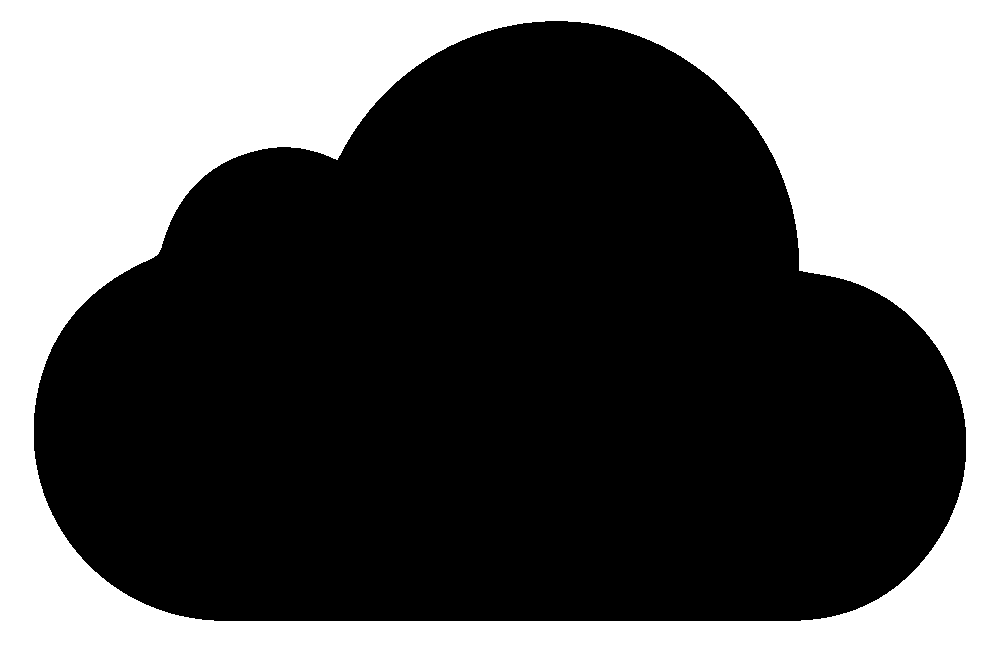

In [93]:
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

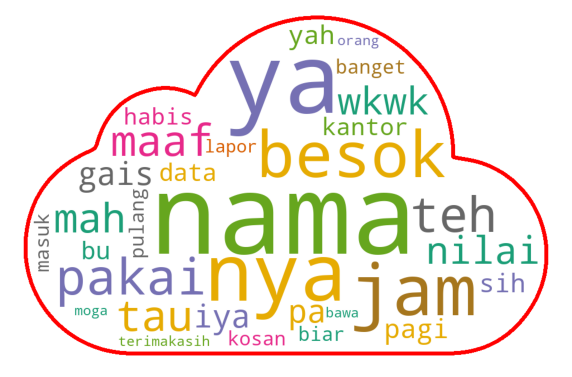

In [97]:
#Word cloud untuk SMS P

sms_normal = data[data.label==0]
normal_string = []

for t in sms_normal.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color='white',colormap='Dark2',max_font_size=200,min_font_size=25,
                      mask=cloud_mask,contour_width=10 , contour_color='red',max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


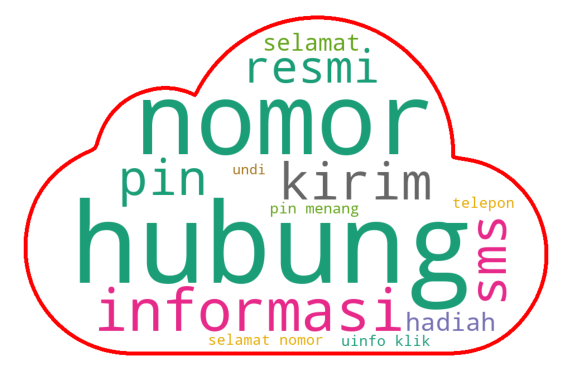

In [98]:
#Word cloud untuk SMS SPAM

sms_normal = data[data.label==1]
normal_string = []

for t in sms_normal.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color='white',colormap='Dark2',max_font_size=200,min_font_size=25,
                      mask=cloud_mask,contour_width=10 , contour_color='red',max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


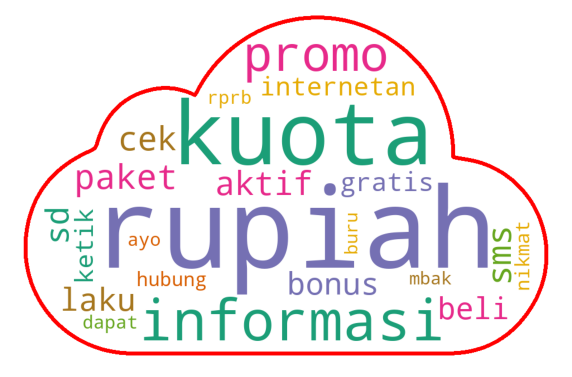

In [99]:
#Word cloud untuk SMS Promo

sms_normal = data[data.label==2]
normal_string = []

for t in sms_normal.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color='white',colormap='Dark2',max_font_size=200,min_font_size=25,
                      mask=cloud_mask,contour_width=10 , contour_color='red',max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
